In [19]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe(day):
    db = DbConn()
    
    select_query = """
    select moviecd, audicnt 
    from boxoffice2  
    where  opendt +:day = dailydate and dailydate < TO_DATE('19/01/01', 'YY/mm/dd') and dailydate > TO_DATE('03/01/01', 'YY/mm/dd') 
    order by moviecd
    """
    params = {"day":day}
    select_result = db.execute(select_query,params)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result

day = 1

def movie2_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max_audiacc, actors1_max, actors2_max, actors3_max, actors4_max,
    actors1_avg, actors2_avg, actors3_avg, actors4_avg,
    actors1_100cnt, actors2_100cnt, actors3_100cnt, actors4_100cnt,
    prod_max,prod_avg,prod_100cnt,
    genre_max,genre_avg,genre_100cnt,
    genresub_max,genresub_avg,genresub_100cnt,
    director_max,director_avg,director_100cnt
    
    from movie2
    where opendt < TO_DATE('19/01/01', 'YY/mm/dd') and opendt > TO_DATE('03/01/01', 'YY/mm/dd') 
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result


def screen_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd, scrncnt
    
    from boxoffice2
    where dailydate = opendt
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# def max_dataframe():
#     db = DbConn()
    
#     select_query = """
#     select moviecd,  max(audiacc)
#     from boxoffice 
#     group by moviecd
#     order by moviecd
#     """
#     select_result = db.execute(select_query)

#     print("누적 작업 완료. -----")
#     db.disconnect()
#     return  select_result

# print(week_dataframe(13))

print(movie2_dataframe())


누적 작업 완료. -----
[(19818004, 44957, 44957, 44957, 44957, None, None, None, None, None, None, None, None, None, None, None, None, 14401147, 771153.1334913112, 253, None, None, None, 44957, 44957, 0), (19820019, 837633, 7804820, 1914866, 837633, None, None, None, None, None, None, None, None, None, 837633, 543927, None, 6610836, 490146.233256351, 66, None, None, None, 837633, 286108, 0), (19918269, 8288, 3229800, 2400137, 11743, None, None, None, None, None, None, None, None, None, None, None, None, 17583608, 1372698.4126778783, 270, 13908898, 1374991.1294117647, 56, 13326826, 2768553, 1), (20020009, 9057, 3270013, 239766, 9057, None, None, 71404.2, None, None, None, None, None, None, None, None, None, 16252575, 725310.5816793893, 132, 12976528, 1070360.9224137932, 69, 13908898, 8439983, 3), (20030003, 12271, 8614613, 7048354, 5426621, 465342, None, None, None, None, None, None, None, None, 296945, 154608, None, 14401147, 771153.1334913112, 253, None, None, None, 1293727, 507661, 2), (200

In [20]:
import pandas as pd
df_week= []
for i in range(0,day):
    df_week_column_name = ['mnumber', 'dpeople+'+str(i)]
    df_week.append( pd.DataFrame(week_dataframe(i), columns=df_week_column_name) )
df_week


첫주 작업 완료. -----


[       mnumber  dpeople+0
 0     19820019     102565
 1     20030206       2002
 2     20030248        703
 3     20030316      23992
 4     20030332       1632
 ...        ...        ...
 2812  20189783     139965
 2813  20189843      36136
 2814  20189861      14731
 2815  20189869       3191
 2816  20189901       8178
 
 [2817 rows x 2 columns]]

In [21]:
movie2_dataframe
df_movie2_column_name = ['mnumber', 'sum_total_people', 'actors1_max', 'actors2_max', 'actors3_max', 'actors4_max',
    'actors1_avg', 'actors2_avg', 'actors3_avg', 'actors4_avg',
    'actors1_100cnt', 'actors2_100cnt', 'actors3_100cnt', 'actors4_100cnt',
    'prod_max','prod_avg','prod_100cnt',
    'genre_max','genre_avg','genre_100cnt',
    'genresub_max','genresub_avg','genresub_100cnt',
    'director_max','director_avg','director_100cnt']
df_movie2 = pd.DataFrame(movie2_dataframe(), columns=df_movie2_column_name )
df_movie2.tail()

누적 작업 완료. -----


,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,actors1_avg,actors2_avg,actors3_avg,actors4_avg,...,prod_100cnt,genre_max,genre_avg,genre_100cnt,genresub_max,genresub_avg,genresub_100cnt,director_max,director_avg,director_100cnt
3253,20189843,481315,3404477.0,554797.0,481315.0,2849776.0,NaN,NaN,NaN,634800.842105,...,NaN,14401147.0,8.522432e+05,29.0,14401147.0,771153.133491,253.0,481315,148336,0
3254,20189861,111760,3377381.0,4570046.0,111760.0,111760.0,8.092604e+05,NaN,NaN,NaN,...,NaN,14401147.0,7.711531e+05,253.0,11551067.0,659657.504854,82.0,4100046,1020008,3
3255,20189869,20989,9686269.0,2591058.0,20989.0,20989.0,1.666075e+06,NaN,NaN,NaN,...,NaN,14401147.0,7.711531e+05,253.0,16252575.0,725310.581679,132.0,418470,219730,0
3256,20189882,29414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13369064.0,3.879320e+05,47.0,NaN,NaN,NaN,29414,29414,0
3257,20189901,35694,5059204.0,2285688.0,NaN,NaN,7.774757e+05,NaN,NaN,NaN,...,NaN,17583608.0,1.372698e+06,270.0,11551067.0,659657.504854,82.0,1008251,290310,1


In [22]:
screen_dataframe
df_screen_column_name = ['mnumber', 'screen']
df_screen = pd.DataFrame(screen_dataframe(), columns=df_screen_column_name )
df_screen.tail()

누적 작업 완료. -----


,mnumber,screen
3019,20199923,116
3020,20199949,72
3021,20199950,1192
3022,20199951,653
3023,20199981,415


In [23]:
df = df_movie2
df.tail()

,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,actors1_avg,actors2_avg,actors3_avg,actors4_avg,...,prod_100cnt,genre_max,genre_avg,genre_100cnt,genresub_max,genresub_avg,genresub_100cnt,director_max,director_avg,director_100cnt
3253,20189843,481315,3404477.0,554797.0,481315.0,2849776.0,NaN,NaN,NaN,634800.842105,...,NaN,14401147.0,8.522432e+05,29.0,14401147.0,771153.133491,253.0,481315,148336,0
3254,20189861,111760,3377381.0,4570046.0,111760.0,111760.0,8.092604e+05,NaN,NaN,NaN,...,NaN,14401147.0,7.711531e+05,253.0,11551067.0,659657.504854,82.0,4100046,1020008,3
3255,20189869,20989,9686269.0,2591058.0,20989.0,20989.0,1.666075e+06,NaN,NaN,NaN,...,NaN,14401147.0,7.711531e+05,253.0,16252575.0,725310.581679,132.0,418470,219730,0
3256,20189882,29414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13369064.0,3.879320e+05,47.0,NaN,NaN,NaN,29414,29414,0
3257,20189901,35694,5059204.0,2285688.0,NaN,NaN,7.774757e+05,NaN,NaN,NaN,...,NaN,17583608.0,1.372698e+06,270.0,11551067.0,659657.504854,82.0,1008251,290310,1


In [24]:
# df = pd.merge(df_week[0],df_movie2, on='mnumber')

# for i in range(1,day) :
#     df = pd.merge(df_week[i],df, on='mnumber', how='outer')

# df.tail()

In [25]:
df = pd.merge(df,df_screen, on='mnumber')

df.tail()

,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,actors1_avg,actors2_avg,actors3_avg,actors4_avg,...,genre_max,genre_avg,genre_100cnt,genresub_max,genresub_avg,genresub_100cnt,director_max,director_avg,director_100cnt,screen
2812,20189783,1124639,12264813.0,2352497.0,1867444.0,1124639.0,2.443807e+06,NaN,NaN,NaN,...,14401147.0,7.711531e+05,253.0,NaN,NaN,NaN,1124639,1124639,1,795
2813,20189843,481315,3404477.0,554797.0,481315.0,2849776.0,NaN,NaN,NaN,634800.842105,...,14401147.0,8.522432e+05,29.0,14401147.0,771153.133491,253.0,481315,148336,0,265
2814,20189861,111760,3377381.0,4570046.0,111760.0,111760.0,8.092604e+05,NaN,NaN,NaN,...,14401147.0,7.711531e+05,253.0,11551067.0,659657.504854,82.0,4100046,1020008,3,281
2815,20189869,20989,9686269.0,2591058.0,20989.0,20989.0,1.666075e+06,NaN,NaN,NaN,...,14401147.0,7.711531e+05,253.0,16252575.0,725310.581679,132.0,418470,219730,0,240
2816,20189901,35694,5059204.0,2285688.0,NaN,NaN,7.774757e+05,NaN,NaN,NaN,...,17583608.0,1.372698e+06,270.0,11551067.0,659657.504854,82.0,1008251,290310,1,156


In [26]:
df_movie2_column_name = ['mnumber', 'sum_total_people', 'actors1_max', 'actors2_max', 'actors3_max', 'actors4_max',
    'actors1_avg', 'actors2_avg', 'actors3_avg', 'actors4_avg',
    'actors1_100cnt', 'actors2_100cnt', 'actors3_100cnt', 'actors4_100cnt',
    'prod_max','prod_avg','prod_100cnt',
    'genre_max','genre_avg','genre_100cnt',
    'genresub_max','genresub_avg','genresub_100cnt',
    'director_max','director_avg','director_100cnt','screen']
for i in df_movie2_column_name:
    df[i] = df[i].fillna(0)
    
df.tail()

,mnumber,sum_total_people,actors1_max,actors2_max,actors3_max,actors4_max,actors1_avg,actors2_avg,actors3_avg,actors4_avg,...,genre_max,genre_avg,genre_100cnt,genresub_max,genresub_avg,genresub_100cnt,director_max,director_avg,director_100cnt,screen
2812,20189783,1124639,12264813.0,2352497.0,1867444.0,1124639.0,2.443807e+06,0.0,0.0,0.000000,...,14401147.0,7.711531e+05,253.0,0.0,0.000000,0.0,1124639,1124639,1,795
2813,20189843,481315,3404477.0,554797.0,481315.0,2849776.0,0.000000e+00,0.0,0.0,634800.842105,...,14401147.0,8.522432e+05,29.0,14401147.0,771153.133491,253.0,481315,148336,0,265
2814,20189861,111760,3377381.0,4570046.0,111760.0,111760.0,8.092604e+05,0.0,0.0,0.000000,...,14401147.0,7.711531e+05,253.0,11551067.0,659657.504854,82.0,4100046,1020008,3,281
2815,20189869,20989,9686269.0,2591058.0,20989.0,20989.0,1.666075e+06,0.0,0.0,0.000000,...,14401147.0,7.711531e+05,253.0,16252575.0,725310.581679,132.0,418470,219730,0,240
2816,20189901,35694,5059204.0,2285688.0,0.0,0.0,7.774757e+05,0.0,0.0,0.000000,...,17583608.0,1.372698e+06,270.0,11551067.0,659657.504854,82.0,1008251,290310,1,156


In [27]:
# for i in range(0,day) :
#     df['dpeople+'+str(i)] = df['dpeople+'+str(i)].fillna(0)

# df.tail()

In [28]:
# df['sum_total_people'].describe()
print(df['sum_total_people'].quantile(q=0.993, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.965, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.764, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.364, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
     )

a = df['sum_total_people'].quantile(q=0.993, interpolation='nearest')
b = df['sum_total_people'].quantile(q=0.965, interpolation='nearest')
c = df['sum_total_people'].quantile(q=0.764, interpolation='nearest')
d = df['sum_total_people'].quantile(q=0.364, interpolation='nearest')
e = df['sum_total_people'].quantile(q=0, interpolation='nearest')


a = 10000000
b = 5000000
c = 1000000
d = 130000
e = 0


# 1% 1000만
# 4% 500만
# 24% 100만
# 65% 13만
# 100% 0

9945756 4875930 995990 135287 135


In [29]:
score_list = []
for i in df['sum_total_people']:
    if i >= a:
        score_list.append('A')
    elif i >= b:
        score_list.append('B')
    elif i >= c:
        score_list.append('C')
    elif i >= d:
        score_list.append('D')
    else :
        score_list.append('F')

        
df['score'] = score_list
df['score'].head()

0    D
1    F
2    F
3    D
4    F
Name: score, dtype: object

In [30]:
df.groupby('score')['score'].count()

score
A      20
B      76
C     564
D    1150
F    1007
Name: score, dtype: int64

In [31]:
X = df.drop(['mnumber', 'sum_total_people','score'], axis=1)
X.tail()

,actors1_max,actors2_max,actors3_max,actors4_max,actors1_avg,actors2_avg,actors3_avg,actors4_avg,actors1_100cnt,actors2_100cnt,...,genre_max,genre_avg,genre_100cnt,genresub_max,genresub_avg,genresub_100cnt,director_max,director_avg,director_100cnt,screen
2812,12264813.0,2352497.0,1867444.0,1124639.0,2.443807e+06,0.0,0.0,0.000000,14.0,0.0,...,14401147.0,7.711531e+05,253.0,0.0,0.000000,0.0,1124639,1124639,1,795
2813,3404477.0,554797.0,481315.0,2849776.0,0.000000e+00,0.0,0.0,634800.842105,0.0,0.0,...,14401147.0,8.522432e+05,29.0,14401147.0,771153.133491,253.0,481315,148336,0,265
2814,3377381.0,4570046.0,111760.0,111760.0,8.092604e+05,0.0,0.0,0.000000,0.0,0.0,...,14401147.0,7.711531e+05,253.0,11551067.0,659657.504854,82.0,4100046,1020008,3,281
2815,9686269.0,2591058.0,20989.0,20989.0,1.666075e+06,0.0,0.0,0.000000,0.0,0.0,...,14401147.0,7.711531e+05,253.0,16252575.0,725310.581679,132.0,418470,219730,0,240
2816,5059204.0,2285688.0,0.0,0.0,7.774757e+05,0.0,0.0,0.000000,0.0,0.0,...,17583608.0,1.372698e+06,270.0,11551067.0,659657.504854,82.0,1008251,290310,1,156


In [32]:
Y=df['score']

In [33]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=4, learning_rate=0.3,  random_state=999)
gbc.fit(X_train,y_train)
gbc.score(X_train,y_train),gbc.score(X_test,y_test)



(1.0, 0.8806146572104019)

In [35]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth' : [3,4,5,6],
    'learning_rate' : [0.1,0.15, 0.2, 0.25, 0.3]
}

grid_cv_gbc = GridSearchCV(gbc, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_gbc.fit(X_train, y_train.values)
gbc_best = grid_cv_gbc.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_gbc.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_gbc.best_score_))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   41.6s finished


최적 하이퍼 파라미터: 
 {'learning_rate': 0.3, 'max_depth': 4}
최고 예측 정확도: 0.8848


In [36]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=30, 
                        random_state=10, 
                        learning_rate=0.2)
adb.fit(X_train,y_train)
adb.score(X_train,y_train),adb.score(X_test,y_test)

(0.7818366311516997, 0.7789598108747045)

In [37]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [10,20,30,40,50],
    'learning_rate' : [0.1,0.15, 0.2]
}

grid_cv_adb = GridSearchCV(adb, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_adb.fit(X_train, y_train.values)
adb_best = grid_cv_adb.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_adb.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_adb.best_score_))

Fitting 2 folds for each of 15 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


최적 하이퍼 파라미터: 
 {'learning_rate': 0.2, 'n_estimators': 30}
최고 예측 정확도: 0.7600


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.6s finished


In [38]:
rfc = RandomForestClassifier(n_estimators=70, random_state=999)
rfc.fit(X_train,y_train)
rfc.score(X_train,y_train), rfc.score(X_test,y_test)

(1.0, 0.8865248226950354)

In [39]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [10,20,30,40,50,60,70,80,90,100]
}

grid_cv_rfc = GridSearchCV(rfc, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv_rfc.fit(X_train, y_train.values)
rfc_best = grid_cv_rfc.best_estimator_
print('최적 하이퍼 파라미터: \n', grid_cv_rfc.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_rfc.best_score_))

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.5s finished


최적 하이퍼 파라미터: 
 {'n_estimators': 70}
최고 예측 정확도: 0.8787


In [41]:
from sklearn.metrics import accuracy_score
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_pred_gbc = grid_cv_gbc.best_estimator_.predict(X_test)
gb_accuracy_gbc = accuracy_score(y_test, gb_pred_gbc)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_gbc))

gb_pred_adb = grid_cv_adb.best_estimator_.predict(X_test)
gb_accuracy_adb = accuracy_score(y_test, gb_pred_adb)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_adb))

gb_pred_rfc = grid_cv_rfc.best_estimator_.predict(X_test)
gb_accuracy_rfc = accuracy_score(y_test, gb_pred_rfc)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_rfc))

GBM 정확도: 0.8806
GBM 정확도: 0.7790
GBM 정확도: 0.8865


In [42]:
from sklearn.ensemble import VotingClassifier
votigC = VotingClassifier(estimators=[
    ('gbc',gbc_best),('adb',adb_best),('rfc',rfc_best)], voting='hard', n_jobs=3 )
votigC = votigC.fit(X_train,y_train) 
#예측진행
prediction = votigC.predict(X_test)

In [43]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 보팅한 컨퓨전매트릭스
conMat = pd.DataFrame(confusion_matrix(y_test,prediction),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[F]
True[A],6,0,1,0,0
True[B],0,27,5,0,0
True[C],0,6,163,8,0
True[D],0,1,18,317,8
True[F],0,0,6,46,234


In [44]:
gb_accuracy_voting = accuracy_score(y_test, prediction)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy_voting))

GBM 정확도: 0.8830


In [46]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rfc.fit(X_train, y_train) #랜덤포레스트의 컨퓨전 매트릭스

y_pred = rfc.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[F]
True[A],6,0,1,0,0
True[B],0,25,6,1,0
True[C],0,1,164,12,0
True[D],0,1,15,319,9
True[F],0,0,6,44,236


In [47]:
feat_labels = X.columns
feat_labels

Index(['actors1_max', 'actors2_max', 'actors3_max', 'actors4_max',
       'actors1_avg', 'actors2_avg', 'actors3_avg', 'actors4_avg',
       'actors1_100cnt', 'actors2_100cnt', 'actors3_100cnt', 'actors4_100cnt',
       'prod_max', 'prod_avg', 'prod_100cnt', 'genre_max', 'genre_avg',
       'genre_100cnt', 'genresub_max', 'genresub_avg', 'genresub_100cnt',
       'director_max', 'director_avg', 'director_100cnt', 'screen'],
      dtype='object')

 1) prod_100cnt                    0.010586
 2) prod_avg                       0.036424
 3) genre_max                      0.009814
 4) genre_avg                      0.013825
 5) genre_100cnt                   0.011963
 6) genresub_max                   0.011276
 7) genresub_100cnt                0.011788
 8) genresub_avg                   0.011034
 9) actors2_100cnt                 0.001518
10) actors3_100cnt                 0.001156
11) actors2_avg                    0.009211
12) actors3_avg                    0.008578
13) actors1_avg                    0.008605
14) actors4_avg                    0.006823
15) actors1_100cnt                 0.001561
16) actors4_100cnt                 0.001453
17) prod_max                       0.037972
18) director_avg                   0.157700
19) director_max                   0.214917
20) screen                         0.075961
21) actors1_max                    0.068430
22) actors2_max                    0.083267
23) director_100cnt             

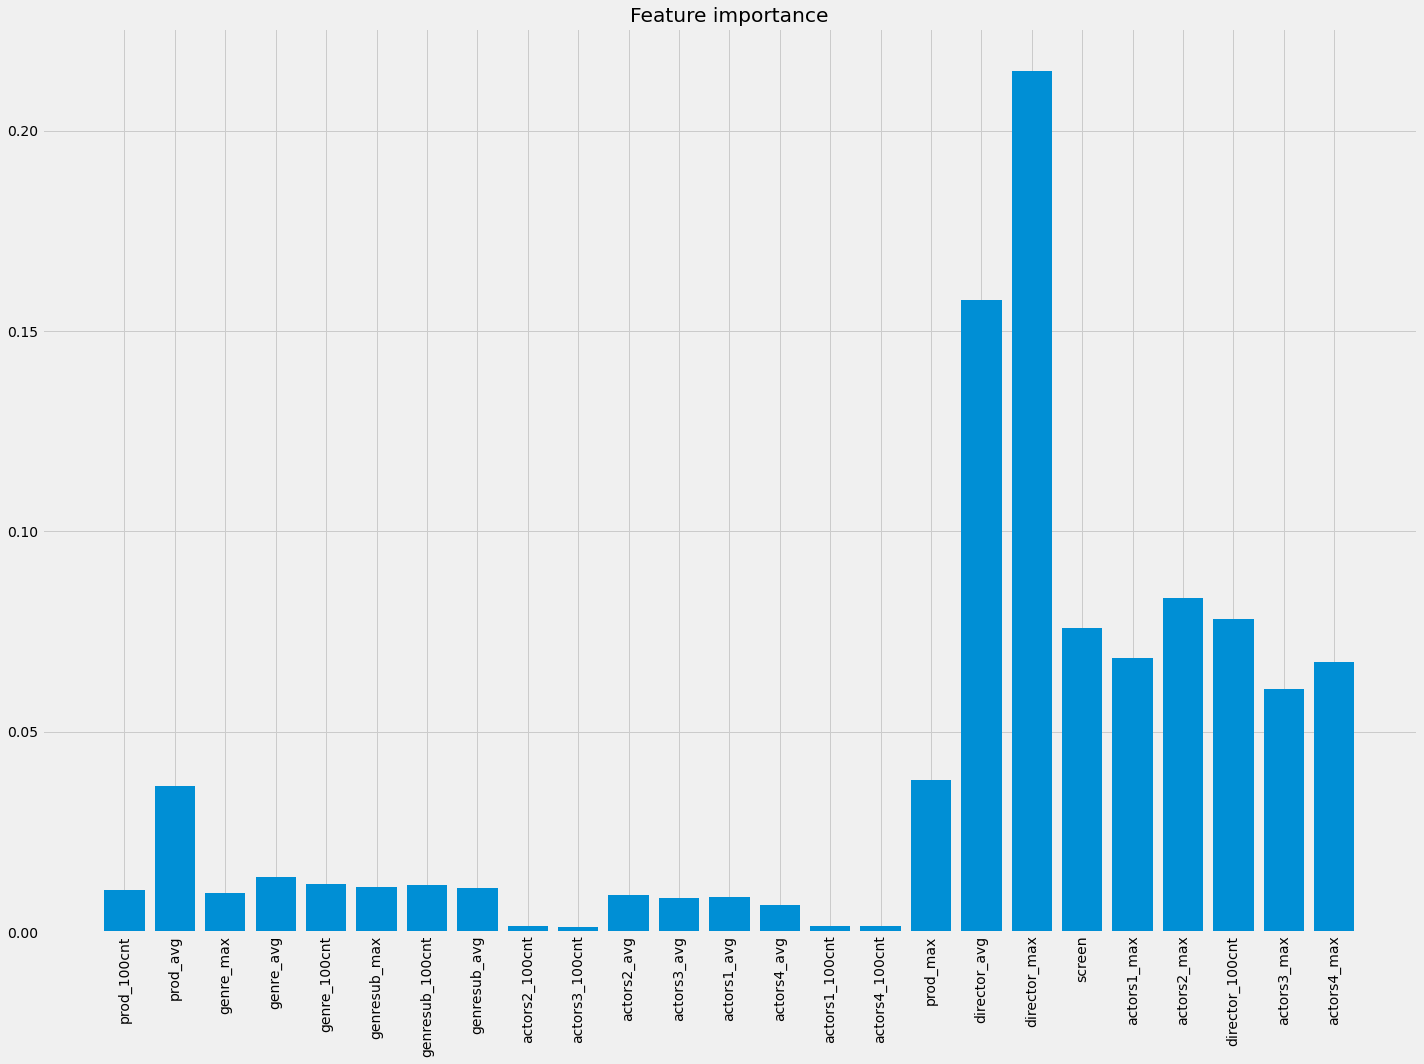

In [48]:
import numpy as np

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,15))
                 
importances = rfc.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.savefig('randomforest.png')
plt.show()

In [155]:
# 1~7 일 정도의 데이터가 제일 중요하고 이후날짜의 데이터는 크게 중요치 않음